In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
# 显示多行的执行信息
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
wine = load_wine()
# wine.data.shape

In [3]:
# 实例化
# 训练集代入实例化后的模型进行训练，使用的是fit
# 使用其他接口将测试集导入我们训练好的模型，去获取我们希望的结果（score,Y_test）

In [4]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [5]:
clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

"Single Tree:{}".format(score_c)
"Random Forest:{}".format(score_r)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'Single Tree:0.8888888888888888'

'Random Forest:0.9444444444444444'

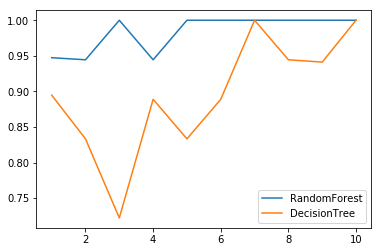

In [6]:
# 交叉验证cross_val_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators = 25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "DecisionTree")
plt.legend()
plt.show()


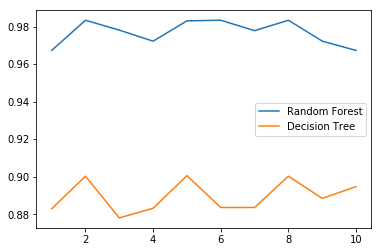

In [8]:
# 做100次的交叉验证

rfc_1 = []
clf_1 = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators = 25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv =10).mean()
    rfc_1.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv =10).mean()
    clf_1.append(clf_s)
    
plt.plot(range(1,11),rfc_1,label ="Random Forest")
plt.plot(range(1,11),clf_1,label = "Decision Tree")
plt.legend()
plt.show()

0.9888888888888889 16


<Figure size 1440x360 with 0 Axes>

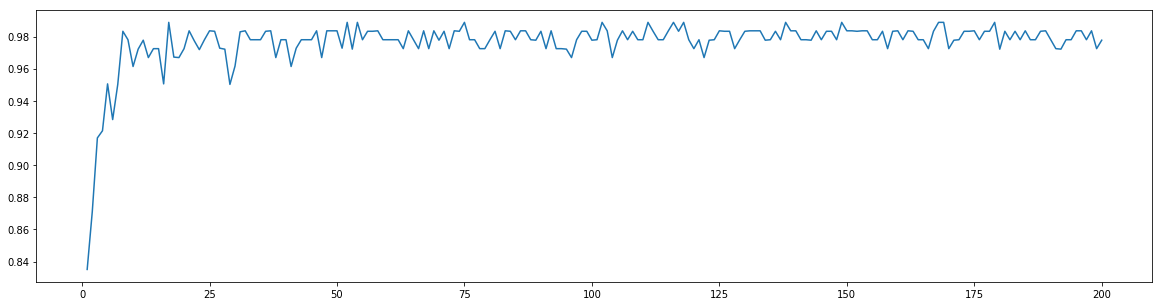

In [9]:
# n_estimators的学习曲线

superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators = i+1,n_jobs = -1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv =10).mean()
    superpa.append(rfc_s)
    
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize = [20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [10]:
# 一个数学公式的运用
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [11]:
# 随机森林的每一棵树都是不一样的原因
rfc = RandomForestClassifier(n_estimators =25)
rfc.fit(Xtrain,Ytrain)
# 随机森林的重要属性之一：estimators_,查看森林的状况
rfc.estimators_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=945955006, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=334892669, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weig

In [12]:
# 对这个对象进行操作
rfc.estimators_[0].random_state

945955006

In [13]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

945955006
334892669
2025309428
830252063
138216002
396897518
773332058
1227937697
807437784
1326681376
1961661639
139882702
751635569
1128671405
2117086809
590712124
761724143
271241008
882554566
386606318
351136228
1066549610
206769210
963936799
2035629840
